<a href="https://colab.research.google.com/github/vinit6515/Bank_Churn_Rate/blob/main/Customer_Churn_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('Bank Customer Churn Prediction.csv')
print(df.head()) #It is used to display top 10 rows


   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [ ]:
#EDA starts (First step is data cleaning)
df.isnull() #to check null value
df.isnull().sum() #Sum of null values in each column

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
df.dtypes #TO CHECK DATA TYPES OF COLUMNS and avoid easy identification problem

,0
customer_id,int64
credit_score,int64
country,object
gender,object
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64


churn
0    7963
1    2037
Name: count, dtype: int64


Text(0, 0.5, 'Counts')

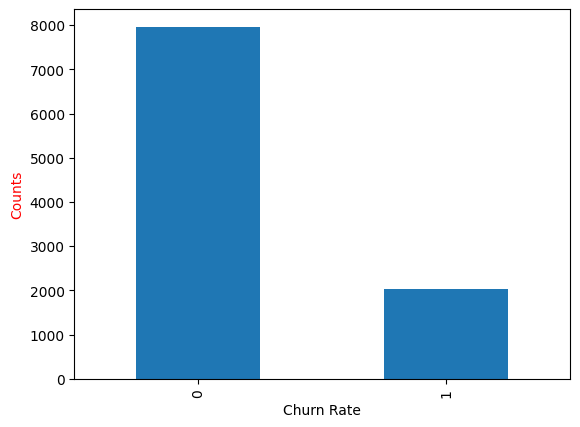

In [ ]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["churn"].map(lambda x: color_wheel.get(x + 1))
print(df.churn.value_counts())

p=df.churn.value_counts().plot(kind="bar")
plt.xlabel('Churn Rate')
plt.ylabel('Counts', color='red')

In [ ]:
#Change value in country column (We are converting it to ordinal data )
df['country'] = df['country'].replace(['Germany'],'0')
df['country'] = df['country'].replace(['France'],'1')
df['country'] = df['country'].replace(['Spain'],'2')
#Change value in gender column (We are converting it to binary data)
#Easy to find similarity and dissimilarity
df['gender'] = df['gender'].replace(['Female'],'0')
df['gender'] = df['gender'].replace(['Male'],'1')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['gender']= pd.to_numeric(df['gender'])
df['country'] = pd.to_numeric(df['country'])

df.rename(columns={'country':'City'}, inplace=True)
df.head()

,customer_id,credit_score,City,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#We will now plot a disimmilarity matrix to show disimilarity bbetween attributes
df2=df.drop(['customer_id'], axis=1)
df2

,credit_score,City,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,0,1,42,3,75075.31,2,1,0,92888.52,1


<Axes: >

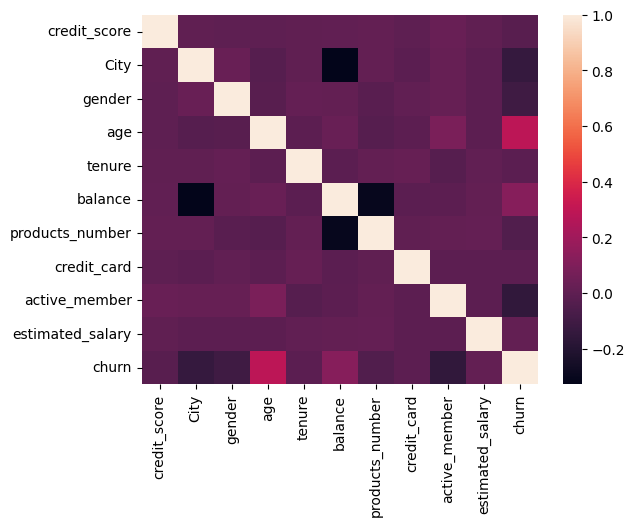

In [ ]:
#To see correlation using heatmap
sns.heatmap(df2.corr())

In [ ]:
#Now we have cleaned integrated and selected data
#Now let's go ahead with setting paramenters for building ml model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict #To get the accuracy of the model
from sklearn.tree import DecisionTreeClassifier #Decision Tree classifier for classification of labelled data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #To evaulate the classification model
# Split dataset into features (X) and target (y)
X = df2.drop('churn', axis=1)  # All columns except 'churn'
y = df2['churn']  # Target column

In [ ]:
# Split data into training and testing sets (80% train, 20% test)
#We are using random sub sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Testing set size: {X_test.shape}, {y_test.shape}")

Training set size: (8000, 10), (8000,)
Testing set size: (2000, 10), (2000,)


In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")


Accuracy Score : 78.55 %


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.7 %


In [ ]:
#XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.4 %


Classification report - n               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



Text(0.5, 1.0, 'Accuracy Score: 0.867')

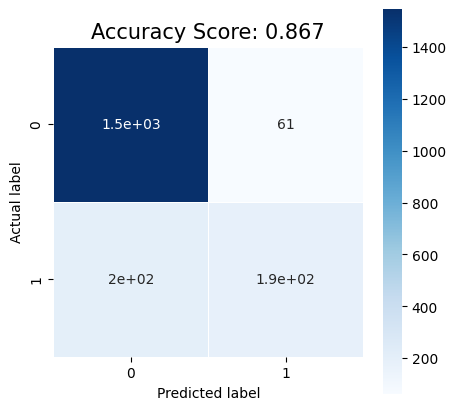

In [ ]:
#Visualizong Random Classifier Model since it has highest accuracy
from sklearn.metrics import classification_report, confusion_matrix
y_pred = rfc.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

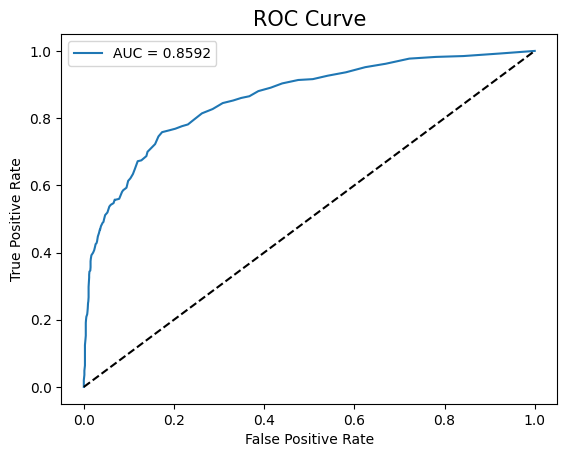

In [ ]:
#Plotting ROC Curve ( True positive Rate against False Positive Rate ( Specificity vs Sensitivity))
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

Classification report - n               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000



Text(0.5, 1.0, 'Accuracy Score: 0.864')

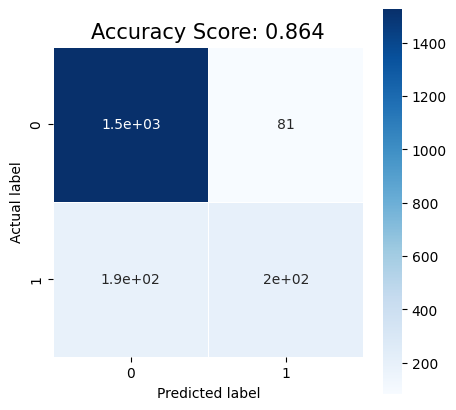

In [ ]:
#Now let's do the same thing for XGBoost
y_pred = xgb_model.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)


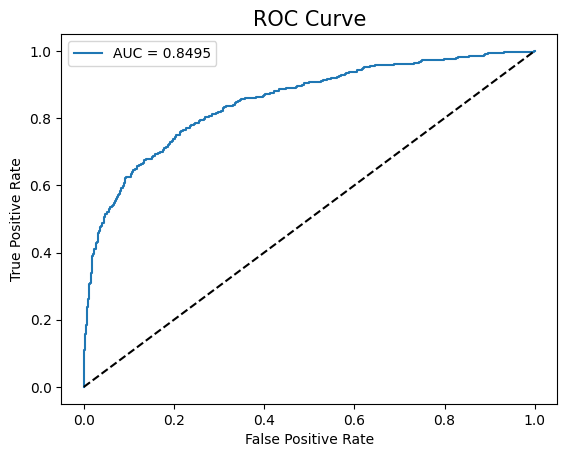

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb_model.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()